In [7]:
library(ggplot2)
library(ggrepel)
library(dplyr)
library(data.table)


Attaching package: ‘data.table’

The following objects are masked from ‘package:dplyr’:

    between, first, last



In [28]:
setwd("/mnt/d/Common/project/yangyangli")
file <- data.table::fread(file="Med23_conserve_Id.csv",header=TRUE)

In [29]:
file <- na.omit(file)

In [30]:
dim(file)

[1] 12503     9

In [31]:
file

ID,readcount_KO_Treg,readcount_WT_Treg,logFC,p.value,qvalue,signature,change,Name
ENSMUSG00000000001,212.685533,256.712136,-0.27143,8.0962e-01,2.4806e-01,FALSE,NOT,Gnai3
ENSMUSG00000000028,23.479544,5.865734,2.00100,1.0441e-04,9.4600e-05,TRUE,NOT,Cdc45
ENSMUSG00000000058,0.000000,6.670835,-3.73790,2.2542e-02,1.1390e-02,FALSE,NOT,Cav2
ENSMUSG00000000078,420.675157,1108.623779,-1.39800,6.4800e-45,1.4800e-43,TRUE,DOWN,Klf6
ENSMUSG00000000088,14.870378,36.804607,-1.30740,1.7004e-02,8.9349e-03,FALSE,NOT,Cox5a
ENSMUSG00000000127,0.000000,5.175648,-3.37170,5.5794e-02,2.5130e-02,FALSE,NOT,Fer
ENSMUSG00000000131,192.923584,133.876759,0.52712,2.2700e-07,3.4100e-07,FALSE,NOT,Xpo6
ENSMUSG00000000134,25.240509,11.271411,1.16310,3.0735e-03,1.9560e-03,TRUE,NOT,Tfe3
ENSMUSG00000000142,13.696400,15.411929,-0.17025,8.0288e-01,2.4633e-01,FALSE,NOT,Axin2
ENSMUSG00000000149,0.000000,14.376800,-4.84570,2.5680e-04,2.1226e-04,TRUE,NOT,Gna12


In [32]:
file$change <- NA

In [34]:
file$change <- as.factor(ifelse(file$p.value < 0.005 & abs(file$logFC) > 1,ifelse(file$logFC > 1,'UP','DOWN'),'NOT'))

In [35]:
head(file)

ID,readcount_KO_Treg,readcount_WT_Treg,logFC,p.value,qvalue,signature,change,Name
ENSMUSG00000000001,212.68553,256.712136,-0.27143,8.0962e-01,2.4806e-01,FALSE,NOT,Gnai3
ENSMUSG00000000028,23.47954,5.865734,2.00100,1.0441e-04,9.4600e-05,TRUE,UP,Cdc45
ENSMUSG00000000058,0.00000,6.670835,-3.73790,2.2542e-02,1.1390e-02,FALSE,NOT,Cav2
ENSMUSG00000000078,420.67516,1108.623779,-1.39800,6.4800e-45,1.4800e-43,TRUE,DOWN,Klf6
ENSMUSG00000000088,14.87038,36.804607,-1.30740,1.7004e-02,8.9349e-03,FALSE,NOT,Cox5a
ENSMUSG00000000127,0.00000,5.175648,-3.37170,5.5794e-02,2.5130e-02,FALSE,NOT,Fer


In [36]:
t <- file[file$change != "NOT"]

In [37]:
dim(t)

[1] 4799    9

In [222]:
length(t)

[1] 12083

In [223]:
p <- ggplot(data = file, aes(x = logFC, y = -log10(p.value), color = change))+geom_point(alpha=0.8, size = 1)+scale_color_manual(values =c("blue","black","red"))+
geom_hline(yintercept = -log10(0.05),lty=4,lwd=0.6,alpha=0.8)+geom_vline(xintercept = c(1,-1),lty=4,lwd=0.6,alpha=0.8)+xlim(-9,9)+theme_bw(base_size = 18)+theme(panel.grid.minor = element_blank(),panel.grid.major = element_blank())

Warning message:
"Removed 9 rows containing missing values (geom_point)."

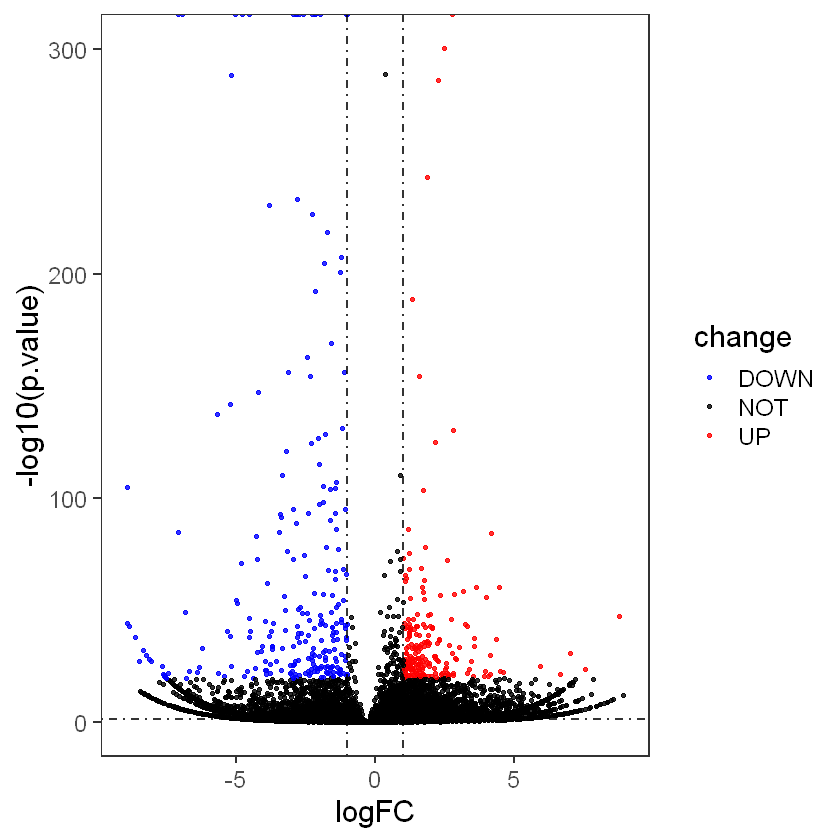

In [224]:
p

In [38]:
write.csv(file, "Med23_p0.005_KO_WT.DEG_differential.csv", quote = T, row.names = F)

In [15]:
?write.csv

In [ ]:
read.table